## Exercise 05

# Neural networks

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.


### Usando Scikit Learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

In [2]:
X = np.array ([[1,1,0,0], [0,1,1,0], [0,0,0,1]])

In [3]:
y = np.array ([[1,0,0,0], [0,0,1,1], [0,1,1,0]])

In [4]:
nn1 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3), random_state=31415, max_iter=2500)

In [5]:
nn1.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31415,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [6]:
nn1.predict(X)

array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

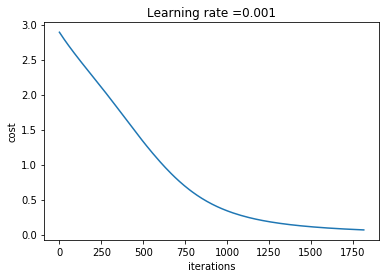

In [8]:
import matplotlib.pyplot as plt

plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(nn1.loss_curve_)
plt.show()

#### Prueba de la red en diferentes escenarios

Teniendo en cuenta que solo existen 2 opciones por cada variable, se evaluarán las 16 posibles alternativas:

In [19]:
X_test=np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1],[1,0,0,0],
                 [0,1,1,1],[0,1,1,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1],[0,0,0,0],])
y_pred=nn1.predict(X_test)

In [22]:
Try=pd.DataFrame(np.concatenate((X_test,y_pred),axis=1),
             columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled', 'Scream', 'Hug','Food','Kiss'])
Try

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1,1,1,1,0,0,1,0
1,1,1,1,0,1,0,0,1
2,1,1,0,1,1,0,0,0
3,1,1,0,0,1,0,0,0
4,1,0,1,1,0,1,1,0
5,1,0,1,0,0,0,1,1
6,1,0,0,1,0,1,1,0
7,1,0,0,0,1,0,0,0
8,0,1,1,1,0,0,1,1
9,0,1,1,0,0,0,1,1


A partir de todas las posibles opciones se opuede notar que la respuesta más frecuente será ofrecer comida (75% de las veces), seguidas por besar y abrazar (30% de las veces) mientars que gritar es el resultdo menos frecuento con solo el 25% de las veces.

### Usando Keras